# Which neighborhood is best?

Lots of things can make good neighborhoods great, or bad neighborhoods terrible. But when it comes to picking the perfect home for yourself and your family, there's one detail that almost everyone forgets...

![zombie apocalypse](https://images.glaciermedia.ca/polopoly_fs/1.23967349.1570222782!/fileImage/httpImage/image.jpg_gen/derivatives/landscape_804/zombie-apocalypse.jpg)

...the Zombie Apocalypse.

For how can you truly live if you spend your days constantly in fear that the **Horde** will come for you any minute now? Certain neighborhoods may have better parks, more attractions, or friendlier communities, but the Zombie Apocalypse is a matter of life and death.

So how can you truly be safe when that Day comes? Thankfully, there are ways to determine just how survivable a neighborhood would be in the Zombie Apocalypse. In this report, we'll look at the presence of steps, retaining walls, and trees as physical features that improve a neighborhood's SI, or Survivability Index.

So let's find out just how safe each neighborhood will be when the dead finally take their place among the living.

## The Survivability Index

First, we need a definitive metric for determining which neighborhood is the safest. Let's think about each physical feature in terms of how you can use it to your advantage when the zombies come for you and use it to come up with a mathematical equation for our SI.

### Steps

![steps](https://tools.wprdc.org/images/pittsburgh/steps/Glenhurst_Rd_to_Lougean_Ave.jpg)

Steps are awesome because zombies can't climb them well. They sort of shuffle their feet when they walk, allowing you to smash them in the skull with a hockey stick or pepper them with throwing stars. For this reason, stairs are essential when it comes to zombie combat, or ZomCom. Getting the high ground on stairs during a swarm could not only save your life, but make the fight incredibly boring. We'll give good stairs a weight of 10 in our equation.

### Retaining Walls

![retaining-wall](https://tools.wprdc.org/images/pittsburgh/retaining_walls/Woodville_Ave_1.jpg)

Retaining walls can be a double-edged sword. If you're at the bottom of one, it can leave you trapped with no way out. However, being stuck against a retaining wall can often be much better than being entirely surrounded by zombies. If you can get your back against one and find something heavy to swing, your odds of survival increase dramatically. Let's give good retaining walls a weight of 7.

### Trees

![tree](https://www.arborday.org/trees/lifestages/images/figure-life-stages.jpg)

Trees are tricky, too; they can be good to climb in a pinch if you're stuck with nowhere else to go, but you need either a ranged weapon or something with a long reach to get out of the situation alive once you're in the tree. Still, they could save your life in the Zombie Apocalypse, too, so we'll give climbable trees a weight of 4.

**One more thing to consider:** not all neighborhoods are the same size. 100 trees in a neighborhood of 1 square mile is far more valuable than 200 trees in a neighorhood of 12 square miles, since you're more likely to have a tree within a usable distance in the first neighborhood. After calculating the weights, we'll divide by the area of the neighborhood in square miles to reach our final SI.

Now that we have our weights and are aware of area differences between neighborhoods, we can calculate the SI of any neighborhood with the equation:

`i = (10s + 7r + 4t) / a`

where `s` is the number of usable steps in the neighborhood, `r` is the number of viable retaining walls, `t` is the number of climbable trees, and `a` is the area of the neighborhood in square miles. `i`, of course, is the Survivability Index.

## The Process

Alright, let's get started. First, we'll import pandas, numpy, and matplotlib.

In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Let's take a look at the retaining walls first.

In [21]:
retaining_walls = pd.read_csv("https://data.wprdc.org/datastore/dump/3e337bde-9997-46fa-b027-481b8f54eb9b")
retaining_walls.head()

,id,name,street,to_street,year_constructed,public_view,inactive,height,length,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,310040364,1003-1031 Arlington East,ARLINGTON AVE,NaN,1940.0,t,f,15.0,310.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.424295,-79.988339
1,947667950,1003-1059 Arlington Ave,ARLINGTON AVE,NaN,1940.0,t,f,8.0,421.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.423962,-79.988804
2,1758453574,1031-1039 Arlington Ave,ARLINGTON AVE,NaN,1940.0,t,f,15.0,57.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.423743,-79.988530
3,819232404,1039-1047 Arlington Ave East,ARLINGTON AVE,NaN,1940.0,t,f,3.0,121.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.423507,-79.988868
4,928916572,1059 Arlington Ave,ARLINGTON AVE,NaN,1940.0,t,f,10.0,20.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.423360,-79.989556


Everything looks good so far. Oh, look, there's a "neighborhood" column! This will make things easy. Let's look at all the neighborhoods first.

In [4]:
retaining_walls["neighborhood"].unique()

array(['Allentown', 'East Carnegie', 'Central Northside',
       'South Side Slopes', 'Sheraden', 'Troy Hill', 'Beltzhoover',
       'Mount Washington', 'Beechview', 'Upper Hill', 'Elliott',
       'Carrick', 'Lincoln-Lemington-Belmar', 'Crafton Heights',
       'Duquesne Heights', 'Morningside', 'Stanton Heights', 'Hays',
       'Banksville', 'Perry North', 'Squirrel Hill South', 'West Oakland',
       'Spring Hill-City View', 'Terrace Village', 'Overbrook',
       'Polish Hill', 'Perry South', 'Brookline', 'Manchester',
       'Fineview', 'Hazelwood', 'East Allegheny', 'Marshall-Shadeland',
       'Westwood', 'Central Oakland', 'Arlington', 'Spring Garden',
       'Crawford-Roberts', 'New Homestead', 'Upper Lawrenceville',
       'South Shore', 'Bloomfield', 'West End', 'Highland Park',
       'St. Clair', 'Greenfield', 'Squirrel Hill North', 'Strip District',
       'Point Breeze', 'Oakwood', 'Ridgemont', 'Brighton Heights',
       'Garfield', 'California-Kirkbride', 'Knoxville', 'M

That's a lot of neighborhoods. Let's find out just how many.

In [7]:
retaining_walls["neighborhood"].nunique()

62

Interesting. 62 neighborhoods. Just how many retaining walls are there in Pittsburgh?

In [8]:
len(retaining_walls)

416

Not too bad. Must be all the hills. They'll be a lot easier to count up in Python pandas. So let's count all the retaining walls for each neighborhood and see where we stand.

In [9]:
retaining_walls["neighborhood"].value_counts()

South Side Slopes           55
Mount Washington            30
Squirrel Hill South         22
Spring Hill-City View       21
Perry South                 18
Perry North                 14
Polish Hill                 12
Allentown                   12
Beechview                   12
Elliott                     10
Marshall-Shadeland           9
Sheraden                     9
Highland Park                9
Stanton Heights              8
Greenfield                   8
Fineview                     8
East Allegheny               7
Hazelwood                    7
Beltzhoover                  7
Point Breeze                 6
Carrick                      6
Banksville                   6
Upper Hill                   6
Spring Garden                5
Garfield                     5
West End                     5
West Oakland                 5
Crawford-Roberts             5
Morningside                  5
Brighton Heights             5
                            ..
Oakwood                      4
Terrace 

Okay, unfortunately we can't see every neighborhood here. It looks like South Side Slopes is a strong contender. Let's put that information in a graph just to be sure.

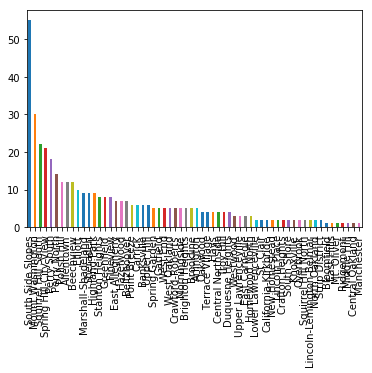

In [11]:
retaining_walls["neighborhood"].value_counts().plot(kind="bar")

Okay, I can't read that at all. Let's try this again.

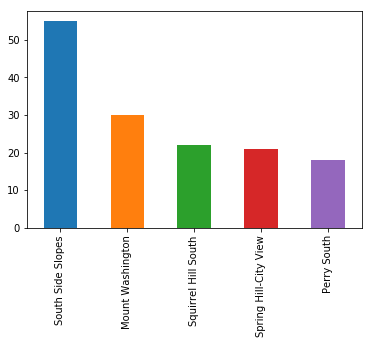

In [21]:
retaining_walls["neighborhood"].value_counts().head().plot(kind="bar")

Perfect! A top 5 lineup! Looks like South Side Slopes is in the lead by a large margin.

But wait - not all retaining walls are equal! Some of them look like this:

![crappy-retaining-wall](https://tools.wprdc.org/images/pittsburgh/retaining_walls/Andick_Way.jpg)

Yeah, that's not saving your life in any zombie apocalypse. It'll trip you up before it'll act as a natural barrier against the advancing horde. So we need some criteria. Clearly we can't just count every wall.

Most NBA basketball players have a reach height of around 8 feet. Some zombies may be taller, but they slouch.

![zombie-slouch](https://partycity6.scene7.com/is/image/PartyCity/_pdp_sq_?$_500x500_$&$product=PartyCity/815658)

Terrible posture, zombie. Get it together.

So we can assume that any retaining walls higher than 8 feet are probably pretty good natural barriers. Let's rerun the stats with that criteria.

Is there a height column or something we can use to filter out our data?

In [22]:
retaining_walls.head()

,id,name,street,to_street,year_constructed,public_view,inactive,height,length,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,310040364,1003-1031 Arlington East,ARLINGTON AVE,NaN,1940.0,t,f,15.0,310.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.424295,-79.988339
1,947667950,1003-1059 Arlington Ave,ARLINGTON AVE,NaN,1940.0,t,f,8.0,421.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.423962,-79.988804
2,1758453574,1031-1039 Arlington Ave,ARLINGTON AVE,NaN,1940.0,t,f,15.0,57.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.423743,-79.988530
3,819232404,1039-1047 Arlington Ave East,ARLINGTON AVE,NaN,1940.0,t,f,3.0,121.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.423507,-79.988868
4,928916572,1059 Arlington Ave,ARLINGTON AVE,NaN,1940.0,t,f,10.0,20.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.423360,-79.989556


Yes, there is! Okay, we'll use that.

In [34]:
def filter_by_height(x, threshold):
    if x > threshold:
        return True
    else:
        return False

tall_enough = retaining_walls["height"] >= 8
retaining_walls_tall = retaining_walls[tall_enough]

retaining_walls_tall.head()

,id,name,street,to_street,year_constructed,public_view,inactive,height,length,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,310040364,1003-1031 Arlington East,ARLINGTON AVE,NaN,1940.0,t,f,15.0,310.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.424295,-79.988339
1,947667950,1003-1059 Arlington Ave,ARLINGTON AVE,NaN,1940.0,t,f,8.0,421.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.423962,-79.988804
2,1758453574,1031-1039 Arlington Ave,ARLINGTON AVE,NaN,1940.0,t,f,15.0,57.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.423743,-79.988530
4,928916572,1059 Arlington Ave,ARLINGTON AVE,NaN,1940.0,t,f,10.0,20.0,https://tools.wprdc.org/images/pittsburgh/reta...,Allentown,3,18.0,42003180300,5,18.0,3,4-5,40.423360,-79.989556
12,1707274409,815-907 Arlington Ave E,ARLINGTON AVE,NaN,1940.0,t,f,14.0,217.0,https://tools.wprdc.org/images/pittsburgh/reta...,South Side Slopes,3,17.0,42003170600,3,17.0,3,4-5,40.425561,-79.990675


That looks right. Let's count them up...

In [35]:
retaining_walls_tall["neighborhood"].value_counts()

South Side Slopes        12
Allentown                 6
East Allegheny            6
Perry South               5
Morningside               4
West End                  4
Banksville                4
Mount Washington          4
Greenfield                3
Upper Hill                3
Fineview                  3
Spring Hill-City View     3
Stanton Heights           3
Beechview                 3
Perry North               3
Squirrel Hill South       3
Beltzhoover               3
Brookline                 2
Spring Garden             2
Marshall-Shadeland        2
Troy Hill                 2
Polish Hill               2
Elliott                   2
Highland Park             1
Crawford-Roberts          1
Crafton Heights           1
Sheraden                  1
Hazelwood                 1
East Carnegie             1
Hays                      1
South Shore               1
Brighton Heights          1
Name: neighborhood, dtype: int64

...and graph them again.

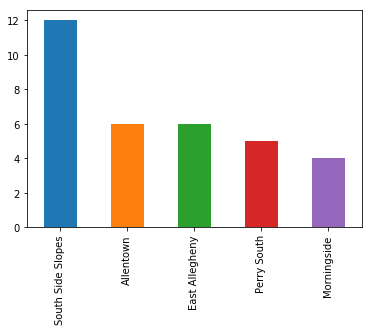

In [40]:
retaining_walls_tall["neighborhood"].value_counts().head().plot(kind="bar")

Looks like South Side Slopes still has the largest number of viable retaining walls, after we parsed out the unhelpful ones. However, Allentown and East Allegheny made the Top 5 with this criteria, knocking out Mount Washington and Squirrel Hill South, and Perry South rose up one spot in the leaderboard, making room for Morningside to come in at #5.

Great! South Side Slopes is looking really strong so far! Let's see how it goes from here and move on to the next section! We'll worry about putting the values into the equation at the end of this presentation.

Next, we'll take a look at the steps.

In [4]:
steps = pd.read_csv("https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64")
steps.head(10)

,id,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,326501686,10 Wakefield St,3rd Division,NaN,Concrete,53.0,8.0,0.0,100.0,367.0,...,South Oakland,3.0,4,42003040900,3,4,4,2-11,40.430926,-79.957090
1,527853474,1005 St Martin St,4th Division,NaN,Concrete,33.0,24.0,NaN,NaN,NaN,...,South Side Slopes,3.0,17,42003170600,3,17,3,4-6,40.422410,-79.988215
2,1074700399,1017 St Martin St,4th Division,NaN,Concrete,52.0,4.0,NaN,NaN,NaN,...,South Side Slopes,3.0,17,42003170600,3,17,3,4-6,40.422471,-79.987604
3,50987987,30th St from Bigelow Blvd to Leander St,3rd Division,1948-01-01,Concrete,106.0,106.0,0.0,100.0,235.0,...,Bedford Dwellings,7.0,6,42003060500,3,6,2,2-24,40.454787,-79.968453
4,173445306,30th St from Paulowna to Bigelow Blvd,6th Division,1948-01-01,Concrete,204.0,85.0,1.0,4.0,422.0,...,Polish Hill,7.0,6,42003060500,6,6,2,2-6,40.455470,-79.968725
5,1770071723,53rd St from Holmes St to Lotus Way West,2nd Division,1949-01-01,Concrete,105.0,44.0,1.0,8.0,1751.0,...,Upper Lawrenceville,7.0,10,42003101100,2,10,2,3-5,40.480342,-79.950134
6,1298252202,53rd St from Lotus Way to Duncan St,2nd Division,1949-01-01,Concrete,106.0,17.0,NaN,NaN,NaN,...,Upper Lawrenceville,7.0,10,42003101100,2,10,2,3-5,40.480104,-79.949804
7,1726357152,54th St from Wickliff to Camelia St,2nd Division,NaN,Concrete,424.0,188.0,1.0,10.0,1227.0,...,Upper Lawrenceville,7.0,10,42003101800,2,10,2,3-5,40.479915,-79.947301
8,652746099,56th St from Carnegie St to Duncan St,2nd Division,1946-01-01,Concrete,468.0,249.0,0.0,100.0,507.0,...,Upper Lawrenceville,7.0,10,42003101100,2,10,2,3-5,40.483330,-79.946816
9,1945192976,56th St from Celadine St to Alford Way,2nd Division,NaN,Wood,36.0,8.0,0.0,100.0,422.0,...,Stanton Heights,7.0,10,42003101800,2,10,5,3-5,40.482176,-79.944273


Finally we will finish by evaluating the trees.

In [13]:
trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")
trees.head()

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106


In [14]:
trees["neighborhood"].unique()

array(['Homewood North', 'Oakwood', 'South Side Flats', 'East Allegheny',
       'Highland Park', 'Stanton Heights', 'Sheraden', 'Chartiers City',
       'Elliott', 'Morningside', 'Bloomfield', 'Friendship', 'Garfield',
       'Polish Hill', 'Lower Lawrenceville', 'Central Northside',
       'East Liberty', 'Central Lawrenceville', 'Shadyside',
       'Allegheny Center', 'Homewood South', 'Point Breeze North',
       'East Hills', 'Homewood West', 'Greenfield', 'Hazelwood',
       'Squirrel Hill South', 'Marshall-Shadeland', 'Brighton Heights',
       'North Shore', 'Overbrook', 'Knoxville', 'Brookline',
       'South Side Slopes', 'Arlington', 'Arlington Heights', 'Carrick',
       'Bedford Dwellings', 'Central Business District', 'Bluff',
       'West Oakland', 'South Oakland', 'Squirrel Hill North',
       'Point Breeze', 'Lincoln-Lemington-Belmar', 'Bon Air',
       'Mount Washington', 'California-Kirkbride', 'New Homestead',
       'Central Oakland', 'Crafton Heights', 'Beechview'

In [22]:
trees["neighborhood"].nunique()
len(trees)

45621

In [23]:
trees["neighborhood"].value_counts()

Squirrel Hill South          5073
Highland Park                2941
Squirrel Hill North          2079
South Side Flats             1693
Shadyside                    1558
Bloomfield                   1436
East Liberty                 1366
Point Breeze                 1316
Perry North                  1007
Central Business District    1002
Brighton Heights              910
Mount Washington              874
Allegheny Center              867
Brookline                     853
North Oakland                 775
Carrick                       772
Greenfield                    745
Central Lawrenceville         713
Manchester                    707
Stanton Heights               700
Central Northside             674
Garfield                      626
Beechview                     611
Hazelwood                     574
Crawford-Roberts              568
Point Breeze North            565
Lincoln-Lemington-Belmar      523
Lower Lawrenceville           508
Marshall-Shadeland            488
Strip District

In [25]:
tall_enough_tree = trees["height"] >= 8
tall_trees = trees[tall_enough_tree]

tall_trees.head()

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
5,1333224197,5550,BRYANT ST,Oak: Pin,Quercus palustris,45.0,18.0,35.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.477496,-79.924568
6,239290336,5503,BRYANT ST,Dogwood: Corneliancherry,Cornus mas,8.0,4.0,99.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478403,-79.925985


In [26]:
tall_trees["neighborhood"].value_counts()

Squirrel Hill South          2358
Squirrel Hill North          1553
South Side Flats             1412
Shadyside                    1259
East Liberty                 1177
Bloomfield                   1126
Highland Park                1039
Central Business District     935
Point Breeze                  922
Brighton Heights              736
Brookline                     682
Mount Washington              643
Carrick                       608
Stanton Heights               602
Central Lawrenceville         589
Greenfield                    577
Central Northside             572
Manchester                    551
North Oakland                 535
Beechview                     511
Garfield                      487
Lincoln-Lemington-Belmar      464
Crawford-Roberts              462
Hazelwood                     451
Lower Lawrenceville           442
North Shore                   428
Strip District                426
East Hills                    409
Point Breeze North            404
Marshall-Shade

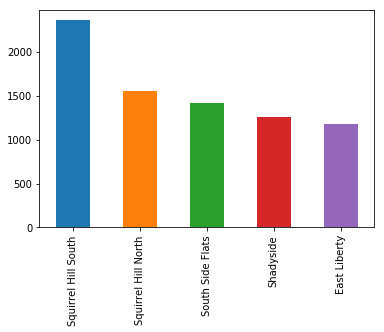

In [27]:
tall_trees["neighborhood"].value_counts().head().plot(kind="bar")